# 1) Leitura do Arquivo LHE

In [165]:
# Instalação das bibliotecas necessárias
!pip install pylhe
import pylhe
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para clonar o repositório para dentro do Colab
!git clone https://github.com/eu-gcalmeida/gcalmeida.git # Substitui pelo TEU link do github

# Entra na pasta do repositório
%cd gcalmeida

# Agora os ficheiros estão acessíveis diretamente
# O comando abaixo mostra se correu bem e o que está na pasta
print("\nConteúdo descarregado:")
!ls -R

Cloning into 'gcalmeida'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 11), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 6.91 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/gcalmeida/gcalmeida/gcalmeida/gcalmeida/gcalmeida/gcalmeida/gcalmeida/gcalmeida

Conteúdo descarregado:
.:
data  instrucoes.txt  parte1.txt  README.md

./data:
fundo.lhe.gz  sinal.lhe.gz  sobre_lhe.txt


# 2) Investigação Preliminar do Arquivo

## Número total de eventos nas amostras

In [166]:
# Defina o caminho do arquivo
arquivo_sinal = 'data/sinal.lhe.gz' # Ajuste o caminho!
arquivo_fundo = 'data/fundo.lhe.gz' # Ajuste o caminho!
# Mostrando qual arquivo será usado para fazer a contagem
print(f"Lendo arquivos: {arquivo_sinal}, {arquivo_fundo}...")
# Convertendo para lista para poder reutilizar os dados sem reler o arquivo
eventos_sinal, eventos_fundo = list(pylhe.read_lhe(arquivo_sinal)), list(pylhe.read_lhe(arquivo_fundo))

Lendo arquivos: data/sinal.lhe.gz, data/fundo.lhe.gz...


/tmp/ipython-input-69043056.py:7: DeprecationWarning: read_lhe is deprecated and will be removed in a future version. Use `LHEFile.fromfile(...).events` instead
  eventos_sinal, eventos_fundo = list(pylhe.read_lhe(arquivo_sinal)), list(pylhe.read_lhe(arquivo_fundo))


In [167]:
# Contagem (Objetivo 2a)
print(f"Número total de eventos: {arquivo_sinal} = {len(eventos_sinal)} eventos, {arquivo_fundo} = {len(eventos_fundo)} eventos")

Número total de eventos: data/sinal.lhe.gz = 10000 eventos, data/fundo.lhe.gz = 10000 eventos


## Investigação Preliminar dos Eventos

### Eventos únicos nas amostras

In [168]:
# Dicionário de nomes (PDG ID -> Nome)
pdg_map = {
    1: "d", 2: "u", 3: "s", 4: "c", 5: "b", 6: "t", -1: "anti-d", -2: "anti-u", -3: "anti-s", -4: "anti-c", -5: "anti-b", -6: "anti-t",
    11: "e-", 12: "nu_e", 13: "mu-", 14: "nu_mu", 15: "tau-", 16: "nu_tau", -11: "e+", -12: "anti_nu_e", -13: "mu+", -14: "anti_nu_mu", -15: "tau+", -16: "anti_nu_tau",
    21: "gluon", 22: "gamma", 23: "Z0", 24: "W+", -24: "W-", 25: "Higgs"
}

def pegar_nome(pid):
    return pdg_map.get(pid, str(pid))

def mostrar_eventos_unicos(lista_eventos, nome_arquivo):
    print(f"\n{'='*20} Analisando Eventos Únicos: {nome_arquivo} {'='*20}")

    # Conjunto para guardar as "assinaturas" que já vimos
    assinaturas_vistas = set()
    contador_tipos = 0

    for i, evento in enumerate(lista_eventos):
        iniciais = []
        intermediarias = []
        finais = []

        # 1. Classifica as partículas deste evento específico
        for p in evento.particles:
            nome_formatado = f"{pegar_nome(p.id)} ({p.id})"

            if p.status == -1:
                iniciais.append(nome_formatado)
            elif p.status == 2:
                intermediarias.append(nome_formatado)
            elif p.status == 1:
                finais.append(nome_formatado)

        # 2. Cria uma "assinatura" (tupla) para conferir se já vimos este tipo exato antes
        # Ordenamos as listas para que (u, anti-u) seja igual a (anti-u, u)
        assinatura = (tuple(sorted(iniciais)), tuple(sorted(intermediarias)), tuple(sorted(finais)))

        # 3. Se for uma novidade, imprime a tabela!
        if assinatura not in assinaturas_vistas:
            assinaturas_vistas.add(assinatura)
            contador_tipos += 1

            print(f"\n🔎 Tipo de Evento #{contador_tipos} (Encontrado no índice {i})")

            # Cria o DataFrame apenas para este evento
            dict_dados = {
                "Partículas Iniciais (-1)": pd.Series(iniciais),
                "Intermediárias (2)": pd.Series(intermediarias),
                "Finais Detectáveis (1)": pd.Series(finais)
            }

            df = pd.DataFrame(dict_dados)
            display(df.fillna(" ")) # Limpa os valores vazios (NaN)

    print(f"\n✅ Total de variações únicas encontradas: {contador_tipos}")

# --- Execução ---

if 'eventos_sinal' in globals():
    mostrar_eventos_unicos(eventos_sinal, "SINAL")
else:
    print("⚠️ Carregue 'eventos_sinal' primeiro.")

if 'eventos_fundo' in globals():
    mostrar_eventos_unicos(eventos_fundo, "FUNDO")
else:
    print("⚠️ Carregue 'eventos_fundo' primeiro.")


==================== Analisando Eventos Únicos: SINAL ====================

🔎 Tipo de Evento #1 (Encontrado no índice 0)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-u (-2),W- (-24),mu+ (-13)
1,u (2),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #2 (Encontrado no índice 2)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,d (1),W+ (24),mu+ (-13)
1,anti-d (-1),W- (-24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #3 (Encontrado no índice 4)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-c (-4),W- (-24),mu+ (-13)
1,c (4),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #4 (Encontrado no índice 33)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,u (2),W+ (24),mu+ (-13)
1,anti-u (-2),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #5 (Encontrado no índice 55)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,s (3),W+ (24),mu+ (-13)
1,anti-s (-3),W- (-24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #6 (Encontrado no índice 90)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-u (-2),W- (-24),mu+ (-13)
1,u (2),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #7 (Encontrado no índice 358)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-s (-3),W+ (24),mu+ (-13)
1,s (3),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #8 (Encontrado no índice 407)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,d (1),W- (-24),mu+ (-13)
1,anti-d (-1),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #9 (Encontrado no índice 548)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-d (-1),W+ (24),mu+ (-13)
1,d (1),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #10 (Encontrado no índice 586)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-c (-4),W- (-24),mu+ (-13)
1,c (4),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #11 (Encontrado no índice 798)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,c (4),Higgs (25),mu+ (-13)
1,anti-c (-4),W- (-24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #12 (Encontrado no índice 940)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-c (-4),W+ (24),mu+ (-13)
1,c (4),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #13 (Encontrado no índice 1888)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-c (-4),Higgs (25),mu+ (-13)
1,c (4),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #14 (Encontrado no índice 2028)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,s (3),W- (-24),mu+ (-13)
1,anti-s (-3),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #15 (Encontrado no índice 3654)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-u (-2),Z0 (23),mu+ (-13)
1,u (2),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #16 (Encontrado no índice 3736)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,c (4),Z0 (23),mu+ (-13)
1,anti-c (-4),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #17 (Encontrado no índice 4673)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-s (-3),Z0 (23),mu+ (-13)
1,s (3),W+ (24),nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #18 (Encontrado no índice 5754)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-d (-1),Z0 (23),mu+ (-13)
1,d (1),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #19 (Encontrado no índice 8194)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-u (-2),,mu+ (-13)
1,u (2),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



🔎 Tipo de Evento #20 (Encontrado no índice 8201)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-d (-1),,mu+ (-13)
1,d (1),,nu_mu (14)
2,,,mu- (13)
3,,,anti_nu_mu (-14)



✅ Total de variações únicas encontradas: 20

==================== Analisando Eventos Únicos: FUNDO ====================

🔎 Tipo de Evento #1 (Encontrado no índice 0)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,u (2),Z0 (23),mu+ (-13)
1,anti-u (-2),,mu- (13)



🔎 Tipo de Evento #2 (Encontrado no índice 2)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-d (-1),Z0 (23),mu+ (-13)
1,d (1),,mu- (13)



🔎 Tipo de Evento #3 (Encontrado no índice 3)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-u (-2),,mu+ (-13)
1,u (2),,mu- (13)



🔎 Tipo de Evento #4 (Encontrado no índice 5)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,s (3),Z0 (23),mu+ (-13)
1,anti-s (-3),,mu- (13)



🔎 Tipo de Evento #5 (Encontrado no índice 18)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,c (4),Z0 (23),mu+ (-13)
1,anti-c (-4),,mu- (13)



🔎 Tipo de Evento #6 (Encontrado no índice 24)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,anti-d (-1),,mu+ (-13)
1,d (1),,mu- (13)



🔎 Tipo de Evento #7 (Encontrado no índice 38)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,c (4),,mu+ (-13)
1,anti-c (-4),,mu- (13)



🔎 Tipo de Evento #8 (Encontrado no índice 68)


,Partículas Iniciais (-1),Intermediárias (2),Finais Detectáveis (1)
0,s (3),,mu+ (-13)
1,anti-s (-3),,mu- (13)



✅ Total de variações únicas encontradas: 8


### Compilado das partículas envolvidas nos eventos e seus status

In [169]:
# Dicionário simples para traduzir os IDs mais comuns (PDG ID -> Nome)
pdg_map = {
    1: "d", 2: "u", 3: "s", 4: "c", 5: "b", 6: "t", -1: "anti-d", -2: "anti-u", -3: "anti-s", -4: "anti-c", -5: "anti-b", -6: "anti-t",
    11: "e-", 12: "nu_e", 13: "mu-", 14: "nu_mu", 15: "tau-", 16: "nu_tau", -11: "e+", -12: "anti_nu_e", -13: "mu+", -14: "anti_nu_mu", -15: "tau+", -16: "anti_nu_tau",
    21: "gluon", 22: "gamma", 23: "Z0", 24: "W+", -24: "W-", 25: "Higgs"
}

def pegar_nome(pid):
    # Tenta pegar o nome no dicionário, se não achar, devolve o número como string
    return pdg_map.get(pid, str(pid))

def gerar_tabela_resumo(lista_eventos, nome_processo):
    # Sets (conjuntos) para guardar apenas partículas únicas e evitar repetição
    iniciais = set()
    intermediarias = set()
    finais = set()

    # Varre todos os 1000 eventos
    for evento in lista_eventos:
        for p in evento.particles:
            nome_formatado = f"{pegar_nome(p.id)} ({p.id})"

            if p.status == -1:
                iniciais.add(nome_formatado)
            elif p.status == 2: # Em LHE, 2 geralmente é ressonância/intermediário
                intermediarias.add(nome_formatado)
            elif p.status == 1:
                finais.add(nome_formatado)

    # Cria o DataFrame para exibição (lidando com tamanhos diferentes de listas)
    # Convertemos os sets para listas ordenadas
    dict_dados = {
        "Partículas Iniciais (Status -1)": sorted(list(iniciais)),
        "Intermediárias (Status 2)": sorted(list(intermediarias)),
        "Finais Detectáveis (Status 1)": sorted(list(finais))
    }

    # Truque do Pandas para criar tabela com colunas de tamanhos diferentes
    df = pd.DataFrame.from_dict(dict_dados, orient='index').transpose()

    print(f"\n=== Tabela de Partículas: {nome_processo} ===")
    display(df.fillna("-")) # Preenche vazios com traço

# --- Executando para Sinal e Fundo ---
# Certifique-se que você já leu os arquivos antes e guardou em listas!
# Exemplo: eventos_sinal = list(pylhe.read_lhe_with_attributes("sinal.lhe"))

if 'eventos_sinal' in globals():
    gerar_tabela_resumo(eventos_sinal, "Processo de sinal")
else:
    print("⚠️ Variável 'eventos_sinal' não encontrada. Leia o arquivo primeiro.")

if 'eventos_fundo' in globals():
    gerar_tabela_resumo(eventos_fundo, "Processo de fundo")
else:
    print("⚠️ Variável 'eventos_fundo' não encontrada. Leia o arquivo primeiro.")


=== Tabela de Partículas: Processo de sinal ===


,Partículas Iniciais (Status -1),Intermediárias (Status 2),Finais Detectáveis (Status 1)
0,anti-c (-4),Higgs (25),anti_nu_mu (-14)
1,anti-d (-1),W+ (24),mu+ (-13)
2,anti-s (-3),W- (-24),mu- (13)
3,anti-u (-2),Z0 (23),nu_mu (14)
4,c (4),-,-
5,d (1),-,-
6,s (3),-,-
7,u (2),-,-



=== Tabela de Partículas: Processo de fundo ===


,Partículas Iniciais (Status -1),Intermediárias (Status 2),Finais Detectáveis (Status 1)
0,anti-c (-4),Z0 (23),mu+ (-13)
1,anti-d (-1),-,mu- (13)
2,anti-s (-3),-,-
3,anti-u (-2),-,-
4,c (4),-,-
5,d (1),-,-
6,s (3),-,-
7,u (2),-,-


## Identificação dos processos com base nas partículas e seus status

In [170]:
print("="*80)
print("📝 IDENTIFICAÇÃO DOS PROCESSOS FÍSICOS")
print("="*80)
print("""
A identificação dos processos foi realizada associando os IDs das partículas aos
seus códigos de status (1, 2, -1).

1. PROCESSO DE SINAL:
   - Análise: A presença de intermediárias com ID 25 (Higgs) e IDs +/-24 (W) confirma
     a cadeia de decaimento H -> WW.
   - Estado Final: Múons carregados e NEUTRINOS (ID +/-14).
   - Assinatura: A presença de neutrinos resulta em Energia Transversa em Falta (MET).

2. PROCESSO DE FUNDO (Background):
   - Análise: Caracterizado pelo processo Drell-Yan. As intermediárias indicam troca
     de Z0 (ID 23) ou Fóton virtual.
   - Estado Final: Apenas pares de múons (mu+ mu-).
   - Assinatura: AUSÊNCIA de neutrinos no estado final. O sistema é balanceado.
""")
print("="*80)

📝 IDENTIFICAÇÃO DOS PROCESSOS FÍSICOS

A identificação dos processos foi realizada associando os IDs das partículas aos
seus códigos de status (1, 2, -1).

1. PROCESSO DE SINAL:
   - Análise: A presença de intermediárias com ID 25 (Higgs) e IDs +/-24 (W) confirma
     a cadeia de decaimento H -> WW.
   - Estado Final: Múons carregados e NEUTRINOS (ID +/-14).
   - Assinatura: A presença de neutrinos resulta em Energia Transversa em Falta (MET).

2. PROCESSO DE FUNDO (Background):
   - Análise: Caracterizado pelo processo Drell-Yan. As intermediárias indicam troca
     de Z0 (ID 23) ou Fóton virtual.
   - Estado Final: Apenas pares de múons (mu+ mu-).
   - Assinatura: AUSÊNCIA de neutrinos no estado final. O sistema é balanceado.



# 3) Exploração do Conteúdo

## Histogramas das variáveis cinemáticas para as partículas de estado final (exceto neutrinos)

Extraindo dados cinemáticos...


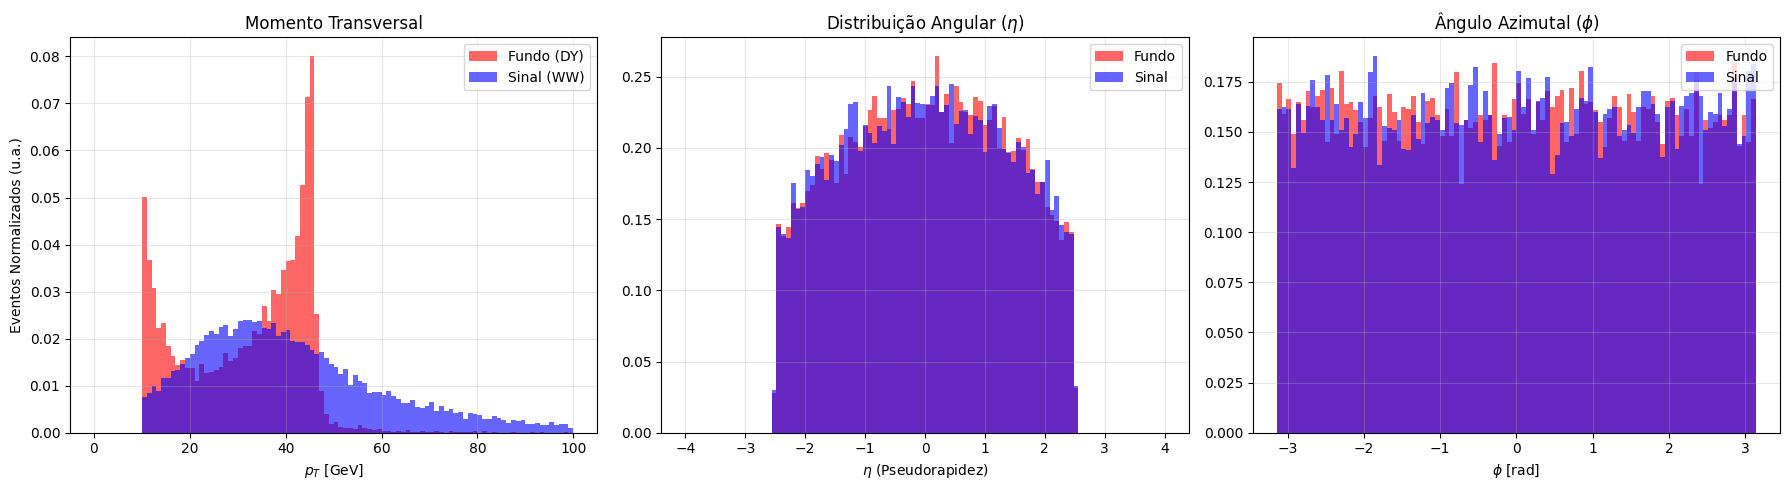

In [171]:
# Definir uma função para extrair as váriaveis cinéticas e criar listas com os valores

def var_cinematicas (evento):
  pt_final = []       # lista do momento transversal
  eta_final = []      # lista da pseudorapidez
  phi_final = []      # lista do ângulo azimutal
  for e in evento:
    for p in e.particles:
        # Objetivo 3: Apenas estado final (status = 1) e ignorar neutrinos
        # Dica: Neutrinos têm IDs 12, 14, 16 (e os antineutrinos negativos)
        is_neutrino = abs(p.id) in [12, -12, 14, -14, -16, 16]

        if p.status == 1 and not is_neutrino:
            # Cálculo do pT
            pt = np.sqrt(p.px**2 + p.py**2)
            pt_final.append(pt)

            # Cálculo aproximado de Eta e Phi (usando numpy)
            # Nota: Pylhe puro às vezes não tem .eta direto, calculamos no braço:
            p_total = np.sqrt(p.px**2 + p.py**2 + p.pz**2)
            if p_total - p.pz != 0: # Evitar divisão por zero
                 eta = 0.5 * np.log((p_total + p.pz) / (p_total - p.pz))
            else:
                 eta = 0 # ou trate como exceção
            eta_final.append(eta)

            phi = np.arctan2(p.py, p.px)
            phi_final.append(phi)
  return pt_final, eta_final, phi_final

# --- Processamento dos Dados ---
print("Extraindo dados cinemáticos...")
pt_sinal, eta_sinal, phi_sinal = var_cinematicas(eventos_sinal)
pt_fundo, eta_fundo, phi_fundo = var_cinematicas(eventos_fundo)

# --- Plotagem dos 3 Gráficos (Subplots) ---
# Criamos uma figura com 1 linha e 3 colunas
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Momento Transversal (pT)
ax[0].hist(pt_fundo, bins=100, range=(0, 100), alpha=0.6, color='red', label='Fundo (DY)', density=True)
ax[0].hist(pt_sinal, bins=100, range=(0, 100), alpha=0.6, color='blue', label='Sinal (WW)', density=True)
ax[0].set_xlabel(r'$p_T$ [GeV]')
ax[0].set_ylabel('Eventos Normalizados (u.a.)')
ax[0].set_title('Momento Transversal')
ax[0].legend()
ax[0].grid(alpha=0.3)

# Gráfico 2: Pseudorapidez (Eta)
# Eta costuma ir de -5 a 5, mas o detetor geralmente foca em -3 a 3
ax[1].hist(eta_fundo, bins=100, range=(-4, 4), alpha=0.6, color='red', label='Fundo', density=True)
ax[1].hist(eta_sinal, bins=100, range=(-4, 4), alpha=0.6, color='blue', label='Sinal', density=True)
ax[1].set_xlabel(r'$\eta$ (Pseudorapidez)')
ax[1].set_title(r'Distribuição Angular ($\eta$)')
ax[1].legend()
ax[1].grid(alpha=0.3)

# Gráfico 3: Ângulo Azimutal (Phi)
# Phi vai de -pi a +pi
ax[2].hist(phi_fundo, bins=100, range=(-np.pi, np.pi), alpha=0.6, color='red', label='Fundo', density=True)
ax[2].hist(phi_sinal, bins=100, range=(-np.pi, np.pi), alpha=0.6, color='blue', label='Sinal', density=True)
ax[2].set_xlabel(r'$\phi$ [rad]')
ax[2].set_title(r'Ângulo Azimutal ($\phi$)')
ax[2].legend()
ax[2].grid(alpha=0.3)

plt.tight_layout() # Ajusta os espaçamentos para não encavalar
plt.show()

## Número total de eventos representados em cada histograma

In [172]:
# contando o número de eventos em cada histograma
# para os dados do sinal
print(f"Número total de eventos no arquivo: {arquivo_sinal} = {len(eventos_sinal)} eventos; Número total de eventos nos histogramas: pt_sinal = {len(pt_sinal)} eventos, eta_sinal = {len(eta_sinal)} eventos; phi_sinal = {len(phi_sinal)} eventos")
# para os dados do fundo
print(f"Número total de eventos no arquivo: {arquivo_fundo} = {len(eventos_fundo)} eventos; Número total de eventos nos histogramas: pt_fundo = {len(pt_fundo)} eventos, eta_fundo = {len(eta_fundo)} eventos; phi_fundo = {len(phi_fundo)} eventos")

Número total de eventos no arquivo: data/sinal.lhe.gz = 10000 eventos; Número total de eventos nos histogramas: pt_sinal = 20000 eventos, eta_sinal = 20000 eventos; phi_sinal = 20000 eventos
Número total de eventos no arquivo: data/fundo.lhe.gz = 10000 eventos; Número total de eventos nos histogramas: pt_fundo = 20000 eventos, eta_fundo = 20000 eventos; phi_fundo = 20000 eventos


## Os histogramas representam todos os eventos do arquivo LHE?

In [177]:
# explicando a diferença de eventos
print('Os histogramas representam todos os eventos do arquivo LHE?\n')
print('Sim, todos os eventos do arquivo HLE estão nos histogramas, mas o número de entradas no histograma é o dobro do número de eventos do arquivo pois cada evento gera 2 múons.\nSe os neutrinos fossem considerados, o número de entradas nos histogramas refentes ao arquivo do \'sinal\' seriam 4 vezes o número de eventos.\n')
print('Observação: os histogramas de $p_T$ iniciam abruptamente em 10 GeV. Isto deve-se a um corte de geração ($p_{T,lep} > 10$ GeV) aplicado no nível do gerador Monte Carlo (MadGraph) para evitar divergências infravermelhas e simular a aceitação mínima do detetor.\nNos arquivos encontram-se:\nLinha 228 (sinal.lhe):  10.0 = ptl  ! minimum pt for the charged leptons\nLinha 229 (fundo.lhe):  10.0 = ptl  ! minimum pt for the charged leptons')

Os histogramas representam todos os eventos do arquivo LHE?

Sim, todos os eventos do arquivo HLE estão nos histogramas, mas o número de entradas no histograma é o dobro do número de eventos do arquivo pois cada evento gera 2 múons.
Se os neutrinos fossem considerados, o número de entradas nos histogramas refentes ao arquivo do 'sinal' seriam 4 vezes o número de eventos.

Observação: os histogramas de $p_T$ iniciam abruptamente em 10 GeV. Isto deve-se a um corte de geração ($p_{T,lep} > 10$ GeV) aplicado no nível do gerador Monte Carlo (MadGraph) para evitar divergências infravermelhas e simular a aceitação mínima do detetor.
Nos arquivos encontram-se:
Linha 228 (sinal.lhe):  10.0 = ptl  ! minimum pt for the charged leptons
Linha 229 (fundo.lhe):  10.0 = ptl  ! minimum pt for the charged leptons


# 4) Filtros e Cortes Cinemáticos

## Cortes cinemáticos simples: (pT> X GeV) e (|η| < Y)

--- APLICANDO CORTE: pT > 28 GeV ---

RESPOSTA SOBRE REPRESENTATIVIDADE DOS HISTOGRAMAS:
SINAL: 10000 eventos processados -> 14693 partículas plotadas.
FUNDO: 10000 eventos processados -> 12996 partículas plotadas.
Conclusão: O histograma tem mais entradas que eventos pois cada evento produz múltiplos múons.

--- EFICIÊNCIA DO CORTE ---
Sinal sobrevivente: 9006/10000 (90.1%)
Fundo sobrevivente: 6498/10000 (65.0%)


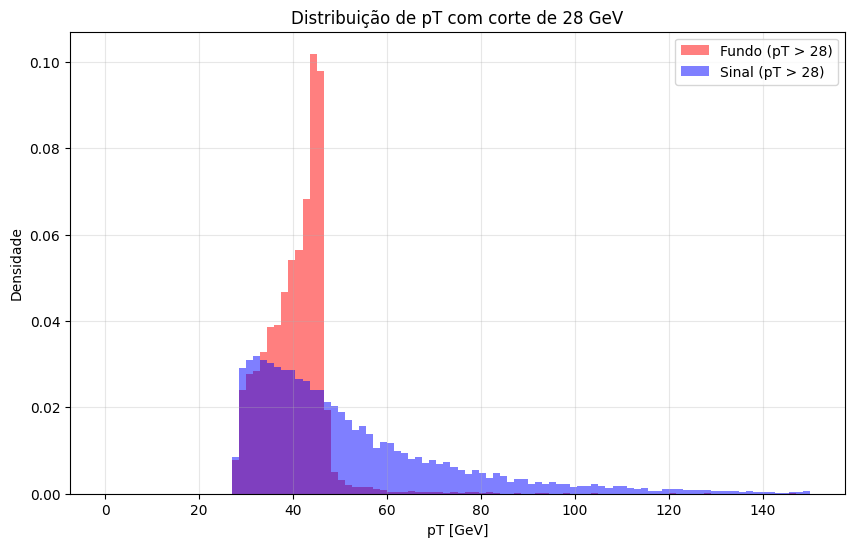

In [174]:
# --- Função de Análise com Filtro ---
def analisar_com_corte(eventos, nome_tipo, pt_minimo=0):
    pt_lista = []

    # Contadores para responder ao Objetivo 3 e 2a
    total_eventos = len(eventos)
    eventos_que_passaram = 0
    particulas_plotadas = 0

    for e in eventos:
        passou_corte = False
        for p in e.particles:
            # Filtro básico: Status 1 e não ser neutrino
            is_neutrino = abs(p.id) in [12, 14, 16]

            if p.status == 1 and not is_neutrino:
                pt = np.sqrt(p.px**2 + p.py**2)

                # --- APLICAÇÃO DO CORTE (Objetivo 4) ---
                if pt > pt_minimo:
                    pt_lista.append(pt)
                    particulas_plotadas += 1
                    passou_corte = True

        if passou_corte:
            eventos_que_passaram += 1

    return pt_lista, total_eventos, eventos_que_passaram, particulas_plotadas

# --- Configuração do Corte ---
corte_pt = 28 # Vamos tentar cortar tudo abaixo de 25 GeV (exemplo)

print(f"--- APLICANDO CORTE: pT > {corte_pt} GeV ---")

# Processa Sinal e Fundo
pt_sinal, ev_tot_s, ev_pass_s, part_s = analisar_com_corte(eventos_sinal, "Sinal", corte_pt)
pt_fundo, ev_tot_f, ev_pass_f, part_f = analisar_com_corte(eventos_fundo, "Fundo", corte_pt)

# --- Respostas para o Relatório (Objetivo 3 - Pergunta) ---
print(f"\nRESPOSTA SOBRE REPRESENTATIVIDADE DOS HISTOGRAMAS:")
print(f"SINAL: {ev_tot_s} eventos processados -> {part_s} partículas plotadas.")
print(f"FUNDO: {ev_tot_f} eventos processados -> {part_f} partículas plotadas.")
print(f"Conclusão: O histograma tem mais entradas que eventos pois cada evento produz múltiplos múons.\n")

print(f"--- EFICIÊNCIA DO CORTE ---")
print(f"Sinal sobrevivente: {ev_pass_s}/{ev_tot_s} ({ev_pass_s/ev_tot_s:.1%})")
print(f"Fundo sobrevivente: {ev_pass_f}/{ev_tot_f} ({ev_pass_f/ev_tot_f:.1%})")

# --- Plotagem Comparativa ---
plt.figure(figsize=(10, 6))
plt.hist(pt_fundo, bins=100, range=(0, 150), alpha=0.5, color='red', label=f'Fundo (pT > {corte_pt})', density=True)
plt.hist(pt_sinal, bins=100, range=(0, 150), alpha=0.5, color='blue', label=f'Sinal (pT > {corte_pt})', density=True)
plt.xlabel('pT [GeV]')
plt.ylabel('Densidade')
plt.title(f'Distribuição de pT com corte de {corte_pt} GeV')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Novos histogramas com corte

Calculando histogramas para pT > 25.0 e |eta| < 2.4...


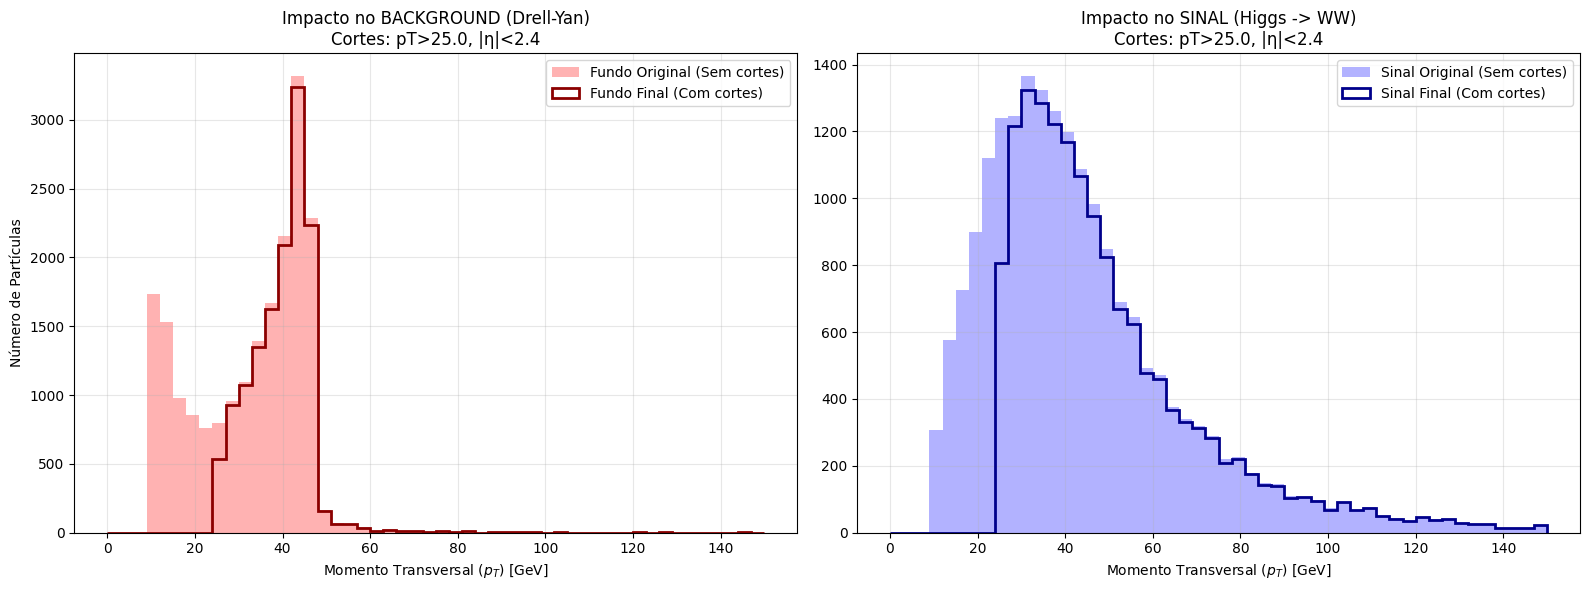


=== RELATÓRIO DE SOBREVIVÊNCIA ===
🔴 Fundo Restante: 13517 de 20000 partículas (67.6%)
🔵 Sinal Restante: 15526 de 20000 partículas (77.6%)

✅ CONCLUSÃO: O corte foi eficaz! Removeu mais fundo do que sinal.


In [178]:
import matplotlib.pyplot as plt
import numpy as np

# --- Função de Filtro (Reutilizando a lógica) ---
def obter_pt_com_cortes(eventos, pt_min=20, eta_max=2.4):
    pt_antes = []
    pt_depois = []

    for e in eventos:
        passou_evento = False
        temp_pt = []

        for p in e.particles:
            # Filtro básico: Status 1 e não ser neutrino
            is_neutrino = abs(p.id) in [12, 14, 16]

            if p.status == 1 and not is_neutrino:
                pt = np.sqrt(p.px**2 + p.py**2)

                # Calcula Eta Manualmente
                p_total = np.sqrt(p.px**2 + p.py**2 + p.pz**2)
                if p_total - p.pz != 0:
                     eta = 0.5 * np.log((p_total + p.pz) / (p_total - p.pz))
                else:
                     eta = 999

                # Guarda TODOS para o "Antes"
                pt_antes.append(pt)

                # Verifica se passa no corte
                if (pt > pt_min) and (abs(eta) < eta_max):
                    temp_pt.append(pt)
                    passou_evento = True

        # Se o evento passou, guardamos os pTs filtrados para o "Depois"
        if passou_evento:
            pt_depois.extend(temp_pt)

    return pt_antes, pt_depois

# ==========================================
# ✂️ DEFINIÇÃO DOS CORTES
# ==========================================
MEU_PT_MIN = 25.0  # Tenta aumentar isso se quiseres limpar mais fundo!
MEU_ETA_MAX = 2.4

print(f"Calculando histogramas para pT > {MEU_PT_MIN} e |eta| < {MEU_ETA_MAX}...")

# Processa os dados
pt_sinal_antes, pt_sinal_depois = obter_pt_com_cortes(eventos_sinal, MEU_PT_MIN, MEU_ETA_MAX)
pt_fundo_antes, pt_fundo_depois = obter_pt_com_cortes(eventos_fundo, MEU_PT_MIN, MEU_ETA_MAX)

# ==========================================
# 📊 PLOTAGEM COMPARATIVA
# ==========================================
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- GRÁFICO 1: O FUNDO (Queremos ver isso sumir!) ---
ax[0].hist(pt_fundo_antes, bins=50, range=(0, 150), color='red', alpha=0.3, label='Fundo Original (Sem cortes)')
ax[0].hist(pt_fundo_depois, bins=50, range=(0, 150), color='darkred', histtype='step', linewidth=2, label='Fundo Final (Com cortes)')
ax[0].set_title(f"Impacto no BACKGROUND (Drell-Yan)\nCortes: pT>{MEU_PT_MIN}, |η|<{MEU_ETA_MAX}")
ax[0].set_xlabel("Momento Transversal ($p_T$) [GeV]")
ax[0].set_ylabel("Número de Partículas")
ax[0].legend()
ax[0].grid(alpha=0.3)

# --- GRÁFICO 2: O SINAL (Queremos manter isso!) ---
ax[1].hist(pt_sinal_antes, bins=50, range=(0, 150), color='blue', alpha=0.3, label='Sinal Original (Sem cortes)')
ax[1].hist(pt_sinal_depois, bins=50, range=(0, 150), color='darkblue', histtype='step', linewidth=2, label='Sinal Final (Com cortes)')
ax[1].set_title(f"Impacto no SINAL (Higgs -> WW)\nCortes: pT>{MEU_PT_MIN}, |η|<{MEU_ETA_MAX}")
ax[1].set_xlabel("Momento Transversal ($p_T$) [GeV]")
ax[1].legend()
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- ANÁLISE DE EFICIÊNCIA ---
print("\n=== RELATÓRIO DE SOBREVIVÊNCIA ===")
print(f"🔴 Fundo Restante: {len(pt_fundo_depois)} de {len(pt_fundo_antes)} partículas ({len(pt_fundo_depois)/len(pt_fundo_antes):.1%})")
print(f"🔵 Sinal Restante: {len(pt_sinal_depois)} de {len(pt_sinal_antes)} partículas ({len(pt_sinal_depois)/len(pt_sinal_antes):.1%})")

if (len(pt_fundo_depois)/len(pt_fundo_antes)) < (len(pt_sinal_depois)/len(pt_sinal_antes)):
    print("\n✅ CONCLUSÃO: O corte foi eficaz! Removeu mais fundo do que sinal.")
else:
    print("\n⚠️ CONCLUSÃO: O corte não foi muito seletivo. Tente aumentar o pT mínimo.")